### <h2 align="center">📊 DPDQ Project</h2>

### <p align="center"> Comparison of K-Anonymity, L-Diversity, and Differential Privacy </p>
#### <p align="center">Aniket Tiwari (MDS202308) | Kironmoy Roy (MDS202332)</p>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from K_and_L_privacy import KAnonymizer

# Load the medical dataset
df = pd.read_csv('insurance.csv')  # Update the path as necessary
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### K-Anonymity

In [23]:
# Quasi-identifiers
quasi_identifiers = ['age', 'sex', 'region','bmi']

# Sensitive attributes
sensitive_attributes = ['charges', 'smoker']

In [24]:
generalization_rules = {
    'age': {
        'Young': (18, 29),
        'Adult': (30, 44),
        'Middle-Aged': (45, 59),
        'Senior': (60, 120)
    },
    'bmi': {
        'Underweight': (0, 18.4),
        'Normal': (18.5, 24.9),
        'Overweight': (25.0, 29.9),
        'Obese': (30.0, 100.0)
    },
    'charges': {
        'Low': (0, 10000),
        'Medium': (10001, 25000),
        'High': (25001, 50000),
        'Very High': (50001, 70000)
    }
}

In [25]:
from K_and_L_privacy import KAnonymizer 

k = 10

# Initialize the KAnonymizer
k_anonymizer = KAnonymizer(k=k)

# Apply K-Anonymity
k_anonymized_df = k_anonymizer.fit_transform(df, quasi_identifiers, generalization_rules)

# Retrieve and display statistics
k_stats = k_anonymizer.get_stats()
print(f"K-Anonymity (k={k}) applied successfully")
print(f"Original records: {k_stats['original_records']}")
print(f"Records after {k}-anonymization: {k_stats['remaining_records']}")
print(f"Records suppressed: {k_stats['suppressed_records']}")
print(f"Suppression rate: {k_stats['suppression_rate']}%")
print(f"Average re-identification risk: {k_stats['avg_reidentification_risk']}")
print(f"Theoretical maximum re-identification probability: {k_stats['max_reidentification_probability']}")

Suppressing 238 records to satisfy 10-anonymity
K-Anonymity (k=10) applied successfully
Original records: 1338
Records after 10-anonymization: 1100
Records suppressed: 238
Suppression rate: 17.79%
Average re-identification risk: 0.050909
Theoretical maximum re-identification probability: 0.1


In [ ]:
sampled_data = k_anonymized_df.sample(n=10, random_state=0)  # Adjust n to 6 or 7 as needed
print("K-Anonymized data:")
sampled_data

K-Anonymized data:


,age,sex,bmi,children,smoker,region,charges
489,Middle-Aged,male,Obese,1,no,northwest,Medium
1049,Middle-Aged,male,Obese,0,yes,southwest,High
584,Young,male,Normal,0,no,southwest,Low
814,Adult,male,Obese,2,no,southeast,Low
1215,Young,male,Obese,0,no,northeast,Medium
365,Middle-Aged,female,Obese,1,no,northeast,Low
645,Middle-Aged,male,Obese,3,no,northeast,Medium
1044,Middle-Aged,male,Obese,1,no,northeast,Medium
1019,Young,female,Obese,2,no,northwest,High
839,Middle-Aged,female,Obese,0,no,northwest,Medium


Suppressing 17 records to satisfy 2-anonymity
Suppressing 39 records to satisfy 3-anonymity
Suppressing 51 records to satisfy 4-anonymity
Suppressing 71 records to satisfy 5-anonymity
Suppressing 184 records to satisfy 9-anonymity
Suppressing 238 records to satisfy 10-anonymity
Suppressing 442 records to satisfy 15-anonymity
Suppressing 725 records to satisfy 20-anonymity


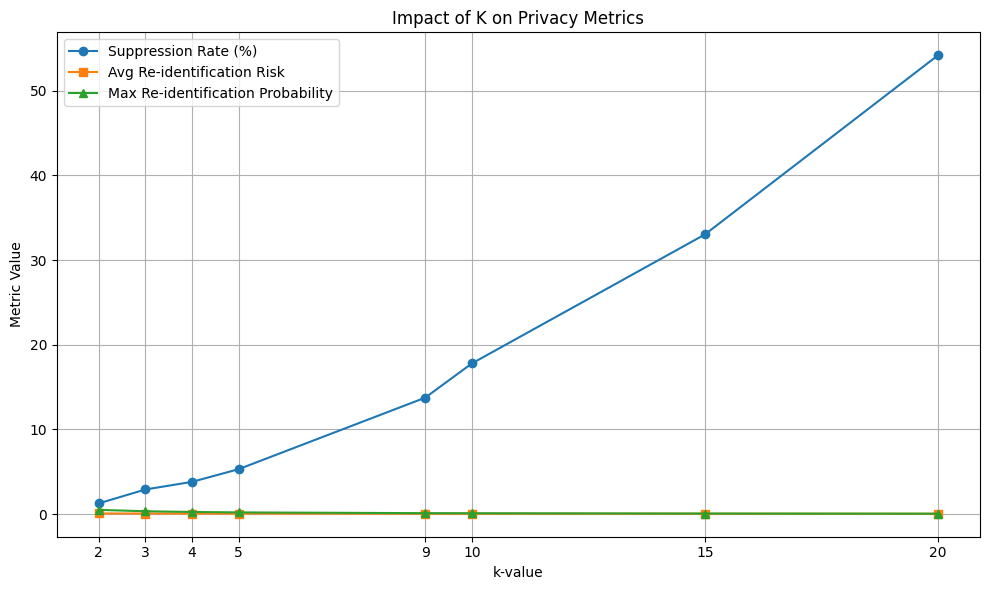

In [20]:
k_values = [2,3,4,5,9,10,15,20]
results = {
    "k": [],
    "suppression_rate": [],
    "avg_reidentification_risk": [],
    "max_reidentification_probability": []
}

for k in k_values:
    k_anonymizer = KAnonymizer(k=k)
    k_anonymized_df = k_anonymizer.fit_transform(df, quasi_identifiers, generalization_rules)
    k_stats = k_anonymizer.get_stats()
    results["k"].append(k)
    results["suppression_rate"].append(k_stats["suppression_rate"])
    results["avg_reidentification_risk"].append(k_stats["avg_reidentification_risk"])
    results["max_reidentification_probability"].append(k_stats["max_reidentification_probability"])

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(results["k"], results["suppression_rate"], marker='o', label="Suppression Rate (%)")
plt.plot(results["k"], results["avg_reidentification_risk"], marker='s', label="Avg Re-identification Risk")
plt.plot(results["k"], results["max_reidentification_probability"], marker='^', label="Max Re-identification Probability")
plt.title("Impact of K on Privacy Metrics")
plt.xlabel("k-value")
plt.ylabel("Metric Value")
plt.xticks(results["k"])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### L-Diversity

In [34]:
from K_and_L_privacy import LDiversifier

# Set the l value
l = 2
# Initialize the LDiversifier
l_diversifier = LDiversifier(l=l)

# Apply L-Diversity
l_diversified_df = l_diversifier.fit_transform(k_anonymized_df, quasi_identifiers, sensitive_attributes)

# Retrieve and display statistics
l_stats = l_diversifier.get_stats()
print(f"L-Diversity (l={l}) applied successfully on K-anonymized data")
for key, value in l_stats.items():
    print(f"{key}: {value}")


Suppressing 26 records to satisfy 2-diversity
L-Diversity (l=2) applied successfully on K-anonymized data
k_anonymized_records: 1100
remaining_records: 1074
additional_suppressed_records: 26
suppression_rate (%): 2.36
equivalence_class_count: 54
avg_equivalence_class_size: 19.89
avg_reidentification_risk: 0.050279
max_reidentification_probability: 0.5


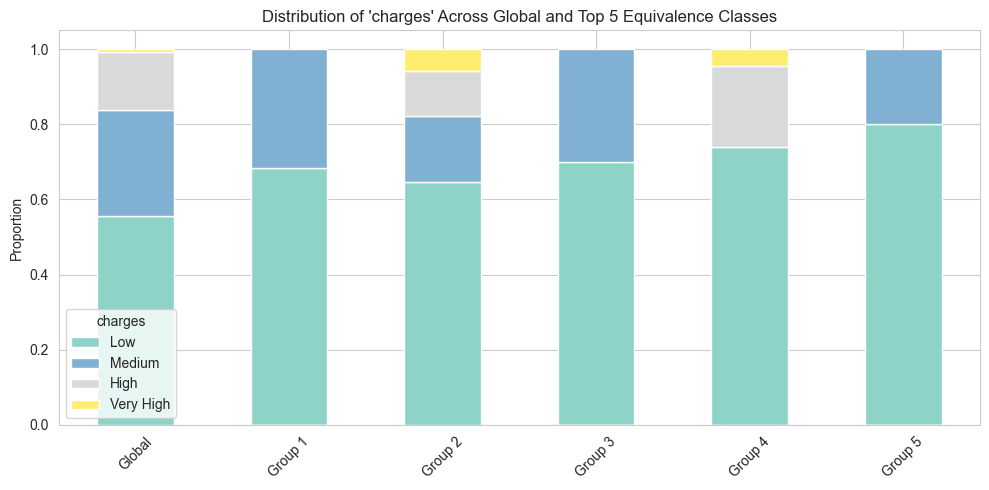

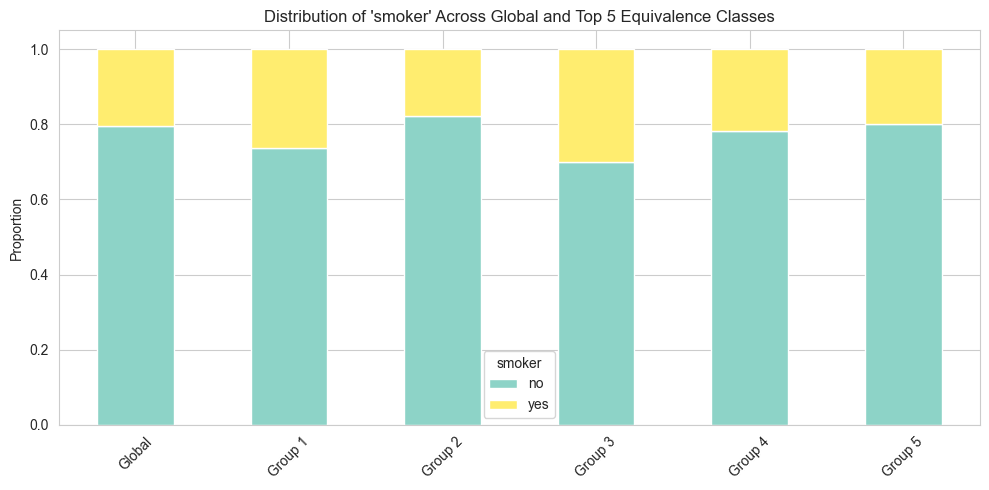

In [ ]:
def plot_sensitive_distributions(df, quasi_cols, sensitive_cols, top_n_groups=5):
    grouped = df.groupby(quasi_cols)
    group_list = list(grouped)

    for col in sensitive_cols:
        fig, ax = plt.subplots(figsize=(10, 5))
        global_dist = df[col].value_counts(normalize=True)
        df_plot = pd.DataFrame(global_dist).T
        df_plot.index = ['Global']

        for i, (name, group) in enumerate(group_list[:top_n_groups]):
            local_dist = group[col].value_counts(normalize=True)
            local_df = pd.DataFrame(local_dist).T
            local_df.index = [f"Group {i+1}"]
            df_plot = pd.concat([df_plot, local_df])

        df_plot.fillna(0, inplace=True)
        df_plot.plot(kind='bar', stacked=True, ax=ax, colormap='Set3')
        plt.title(f"Distribution of '{col}' Across Global and Top {top_n_groups} Equivalence Classes")
        plt.ylabel("Proportion")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Visualize distributions
plot_sensitive_distributions(l_diversified_df, quasi_identifiers, sensitive_attributes)

### Differential Privacy

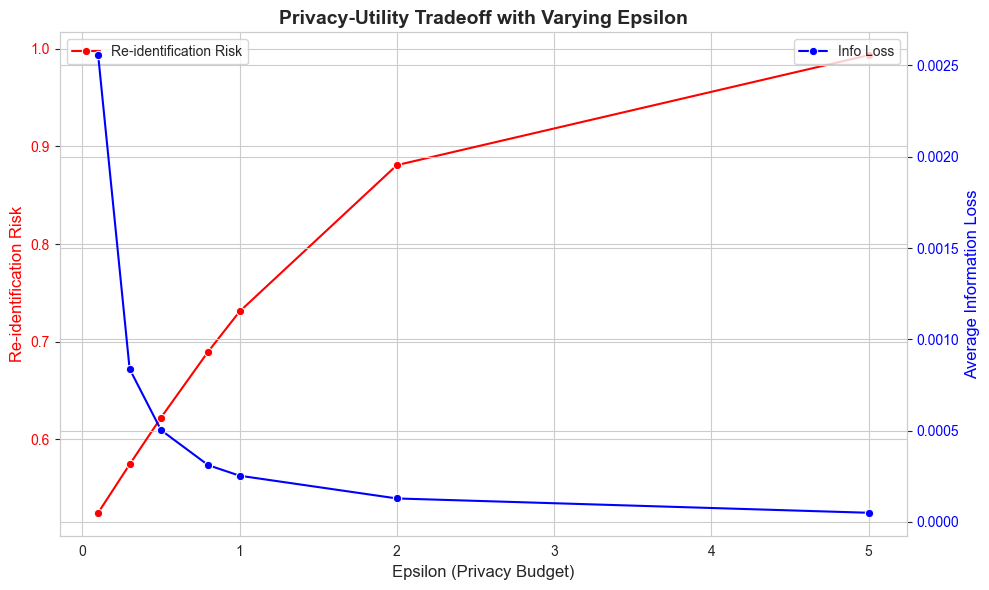

In [43]:
from differential_privacy import DifferentialPrivacy

# Define attributes
numerical_cols = ['age', 'bmi', 'charges']

# Define different epsilon values to test
epsilon_values = [0.1, 0.3, 0.5, 0.8, 1.0, 2.0, 5.0]
risks = []
losses = []

# Run DP for each epsilon
for eps in epsilon_values:
    dp = DifferentialPrivacy(epsilon=eps)
    dp.fit_transform(df.copy(), quasi_identifiers, sensitive_attributes, numerical_cols)
    stats = dp.get_stats()
    risks.append(stats['reidentification_risk'])
    losses.append(stats['avg_info_loss'])

# Create a dataframe for plotting
result_df = pd.DataFrame({
    "Epsilon": epsilon_values,
    "Re-identification Risk": risks,
    "Average Info Loss": losses
})

# Plotting
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot re-identification risk
sns.lineplot(x="Epsilon", y="Re-identification Risk", data=result_df, marker="o", label="Re-identification Risk", ax=ax1, color="red")
ax1.set_ylabel("Re-identification Risk", fontsize=12, color='red')
ax1.set_xlabel("Epsilon (Privacy Budget)", fontsize=12)
ax1.tick_params(axis='y', labelcolor='red')

# Plot info loss on secondary axis
ax2 = ax1.twinx()
sns.lineplot(x="Epsilon", y="Average Info Loss", data=result_df, marker="o", label="Info Loss", ax=ax2, color="blue")
ax2.set_ylabel("Average Information Loss", fontsize=12, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Title and legend
plt.title("Privacy-Utility Tradeoff with Varying Epsilon", fontsize=14, fontweight='bold')
fig.tight_layout()
plt.show()

In [50]:
result_df

,Epsilon,Re-identification Risk,Average Info Loss
0,0.1,0.524979,0.002556
1,0.3,0.574443,0.000838
2,0.5,0.622459,0.000502
3,0.8,0.689974,0.000311
4,1.0,0.731059,0.000253
5,2.0,0.880797,0.000128
6,5.0,0.993307,0.000050


In [48]:
# View transformed data for a specific epsilon
dp = DifferentialPrivacy(epsilon=0.5)
df_transformed = dp.fit_transform(df.copy(), quasi_identifiers, sensitive_attributes, numerical_cols)

# Side-by-side comparison
print("Original vs DP Transformed Data (First 5 Rows):")
pd.concat([df[numerical_cols].head(), df_transformed[numerical_cols].head()], axis=1, keys=["Original", "DP Transformed"])

Original vs DP Transformed Data (First 5 Rows):


Original                      DP Transformed                      
       age     bmi      charges            age     bmi       charges
0       19  27.900  16884.92400             19  27.900  16848.062081
1       18  33.770   1725.55230             18  33.770   1780.835823
2       28  33.000   4449.46200             28  33.000   4448.878396
3       33  22.705  21984.47061             33  22.705  21987.139204
4       32  28.880   3866.85520             32  28.880   3992.452491